In [1]:
setwd("~/master-thesis/Experiments/Experiment 3")
set.seed(20)
library(dplyr)
library(foreign)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [12]:
number_outliers <- function(dataset)
{
  table(dataset[, "outlier"])
}

ratio_outliers <- function(dataset)
{
  (prop.table(table(dataset[, "outlier"])) * 100)
}

number_features <- function(dataset)
{
  length(names(dataset)) - 1
}

In [3]:
dataset_aloi <- read.arff("../../datasets/literature/ALOI/ALOI_withoutdupl.arff") %>% select(-id)
dataset_glass <- read.arff("../../datasets/literature/Glass/Glass_withoutdupl_norm.arff") %>% select(-id)
dataset_iono <- read.arff("../../datasets/literature/Ionosphere/Ionosphere_withoutdupl_norm.arff") %>% select(-id)
dataset_kdd <- read.arff("../../datasets/literature/KDDCup99/KDDCup99_withoutdupl_idf.arff") %>% select(-id)
dataset_lym <- read.arff("../../datasets/literature/Lymphography/Lymphography_withoutdupl_idf.arff") %>% select(-id)
dataset_pen <- read.arff("../../datasets/literature/PenDigits/PenDigits_withoutdupl_norm_v01.arff") %>% select(-id)
dataset_shuttle <- read.arff("../../datasets/literature/Shuttle/Shuttle_withoutdupl_v01.arff") %>% select(-id)
dataset_waveform <- read.arff("../../datasets/literature/Waveform/Waveform_withoutdupl_v01.arff") %>% select(-id)
dataset_wbc <- read.arff("../../datasets/literature/WBC/WBC_withoutdupl_v01.arff") %>% select(-id)
dataset_wdbc <- read.arff("../../datasets/literature/WDBC/WDBC_withoutdupl_v01.arff") %>% select(-id)
dataset_wpbc <- read.arff("../../datasets/literature/WPBC/WPBC_withoutdupl_norm.arff") %>% select(-id)

dataset_ann <- read.arff("../../datasets/semantic/Annthyroid/Annthyroid_withoutdupl_07.arff") %>% select(-id)
dataset_arr <- read.arff("../../datasets/semantic/Arrhythmia/Arrhythmia_withoutdupl_10_v01.arff") %>% select(-id)
dataset_cardio <- read.arff("../../datasets/semantic/Cardiotocography/Cardiotocography_withoutdupl_20_v01.arff") %>% select(-id)
dataset_heart <- read.arff("../../datasets/semantic/HeartDisease/HeartDisease_withoutdupl_20_v01.arff") %>% select(-id)
dataset_hepatitis <- read.arff("../../datasets/semantic/Hepatitis/Hepatitis_withoutdupl_16.arff") %>% select(-id)
dataset_ads <- read.arff("../../datasets/semantic/InternetAds/InternetAds_withoutdupl_norm_19.arff") %>% select(-id)
dataset_blocks <- read.arff("../../datasets/semantic/PageBlocks/PageBlocks_withoutdupl_09.arff") %>% select(-id)
dataset_parkinson <- read.arff("../../datasets/semantic/Parkinson/Parkinson_withoutdupl_20_v01.arff") %>% select(-id)
dataset_pima <- read.arff("../../datasets/semantic/Pima/Pima_withoutdupl_20_v01.arff") %>% select(-id)
dataset_spam <- read.arff("../../datasets/semantic/SpamBase/SpamBase_withoutdupl_20_v01.arff") %>% select(-id)
dataset_stamps <- read.arff("../../datasets/semantic/Stamps/Stamps_withoutdupl_09.arff") %>% select(-id)
dataset_wilt <- read.arff("../../datasets/semantic/Wilt/Wilt_withoutdupl_05.arff") %>% select(-id)

datasets <- list(
  dataset_aloi = dataset_aloi,
  dataset_glass = dataset_glass,
  dataset_iono = dataset_iono,
  dataset_kdd = dataset_kdd,
  dataset_lym = dataset_lym,
  dataset_pen = dataset_pen,
  dataset_shuttle = dataset_shuttle,
  dataset_waveform = dataset_waveform,
  dataset_wbc = dataset_wbc,
  dataset_wdbc = dataset_wdbc,
  dataset_wpbc = dataset_wpbc,
  dataset_ann = dataset_ann,
  dataset_arr = dataset_arr,
  dataset_cardio = dataset_cardio,
  dataset_heart = dataset_heart,
  dataset_hepatitis = dataset_hepatitis,
  dataset_ads = dataset_ads,
  dataset_blocks = dataset_blocks,
  dataset_parkinson = dataset_parkinson,
  dataset_pima = dataset_pima,
  dataset_spam = dataset_spam,
  dataset_stamps = dataset_stamps,
  dataset_wilt = dataset_wilt
)

In [13]:
outliers <- data_frame(dataset = names(sapply(datasets, number_outliers)["yes", ]),
                       number_features = sapply(datasets, number_features),
                       number_outliers = sapply(datasets, number_outliers)["yes", ],
                       ratio_outliers = sapply(datasets, ratio_outliers)["yes", ],
                       number_inliers = sapply(datasets, number_outliers)["no", ],
                       ratio_inliers = sapply(datasets, ratio_outliers)["no", ])

In [14]:
outliers %>% arrange(desc(number_outliers))

dataset,number_features,number_outliers,ratio_outliers,number_inliers,ratio_inliers
dataset_aloi,27,1508,3.0443736,48026,96.95563
dataset_spam,57,632,20.0000000,2528,80.00000
dataset_ann,21,534,7.4905316,6595,92.50947
dataset_blocks,10,510,9.4567031,4883,90.54330
dataset_cardio,21,412,20.0000000,1648,80.00000
dataset_ads,1555,368,18.7182096,1598,81.28179
dataset_wilt,5,257,5.3330567,4562,94.66694
dataset_kdd,40,200,0.4156881,47913,99.58431
dataset_iono,32,126,35.8974359,225,64.10256
dataset_pima,8,125,20.0000000,500,80.00000


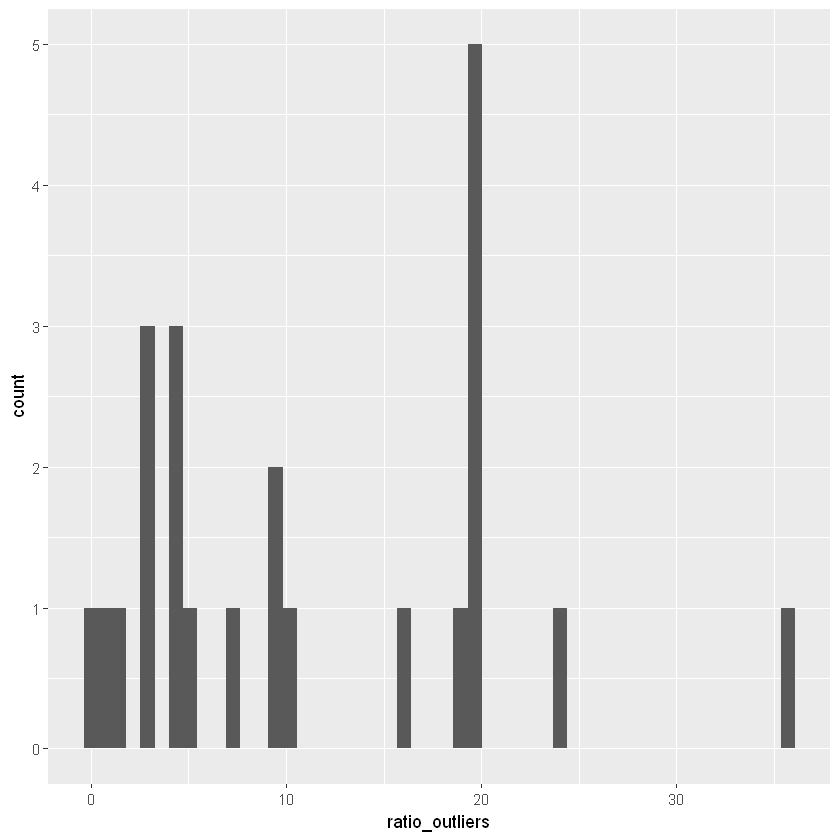

In [6]:
ggplot(outliers, aes(ratio_outliers)) +
  geom_histogram(bins = 50)